In [34]:
import pandas as pd
import numpy as np 


In [35]:
df=pd.read_csv("titanic.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
central_tendency_mean = df.describe().loc[['mean', '50%']]  
print(central_tendency_mean)


      PassengerId  Survived   Pclass       Age     SibSp     Parch       Fare
mean       1100.5  0.363636  2.26555  30.27259  0.447368  0.392344  35.627188
50%        1100.5  0.000000  3.00000  27.00000  0.000000  0.000000  14.454200


In [39]:
central_tendency_mode=df.mode().iloc[0]
print(central_tendency_mode)

PassengerId                              892
Survived                                 0.0
Pclass                                   3.0
Name           Abbott, Master. Eugene Joseph
Sex                                     male
Age                                     21.0
SibSp                                    0.0
Parch                                    0.0
Ticket                              PC 17608
Fare                                    7.75
Cabin                        B57 B59 B63 B66
Embarked                                   S
Name: 0, dtype: object


In [40]:
df[['Sex','Age','Survived']]

,Sex,Age,Survived
0,male,34.5,0
1,female,47.0,1
2,male,62.0,0
3,male,27.0,0
4,female,22.0,1
...,...,...,...
413,male,NaN,0
414,female,39.0,1
415,male,38.5,0
416,male,NaN,0


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

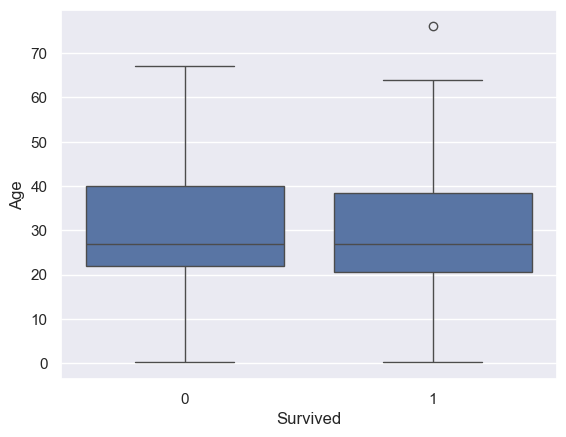

In [42]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.show()


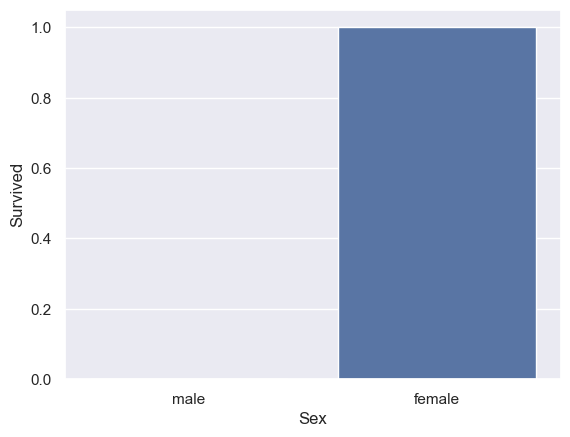

In [58]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()


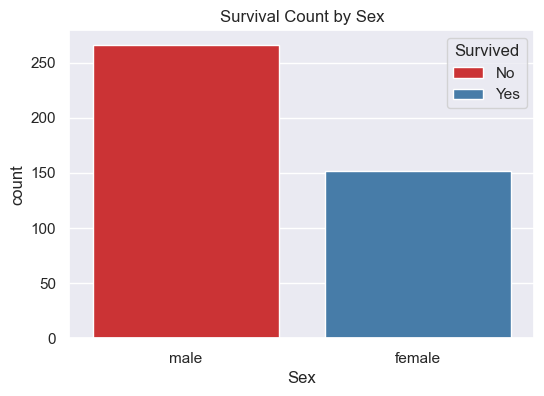

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


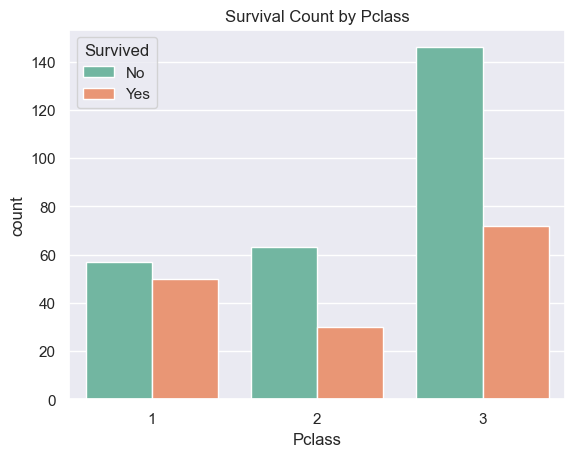

In [56]:
# plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Count by Pclass')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


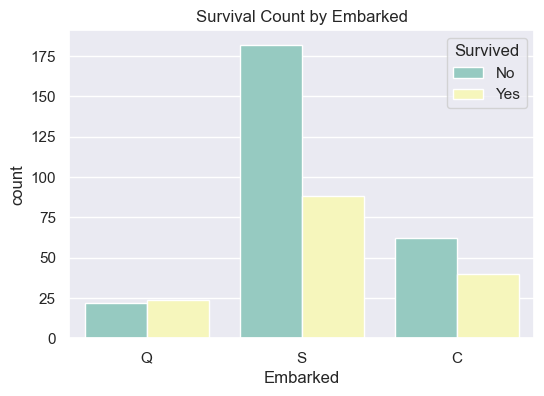

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set3')
plt.title('Survival Count by Embarked')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


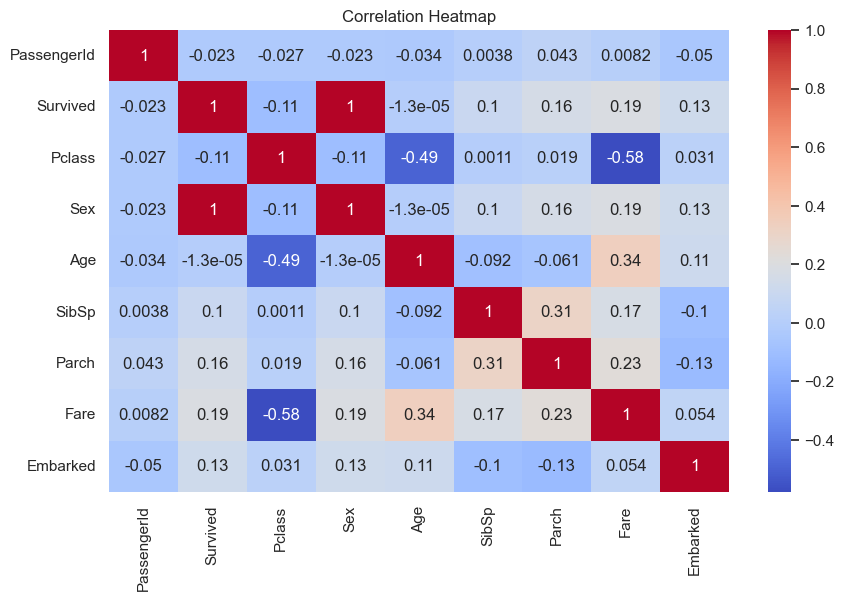

In [47]:

df_heat = df.copy()
df_heat['Sex'] = df_heat['Sex'].map({'male': 0, 'female': 1})
df_heat['Embarked'] = df_heat['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df_corr = df_heat.select_dtypes(include=['float64', 'int64'])

corr = df_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
